<a href="https://colab.research.google.com/github/RonakPandya072/TimeSeries_python/blob/main/Time_series_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Oil Production Forcasting using Time series**

In this project, we have to predict the oil production using various time series model such as ARIMA, ARMA etc.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as sts
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA

All the data are collected from the MOPNG website. Visit the website for more details.

In [5]:
df=pd.read_excel('Oil_production_data.xlsx', usecols=['Date','Actual'],index_col='Date')

In [54]:
df.head()

,Actual
Date,
2021-03-01,2612.96
2021-04-01,2493.26
2021-05-01,2437.96
2021-06-01,2481.66
2021-07-01,2548.78


Let us see what % data is missing in the given dataset using .isnull().mean() function

In [7]:
df.isnull().mean()

Actual    0.078261
dtype: float64

now, it's time to visulize the data, and check the distribution of data..


let's plot distribution plot using sns.distplot() function.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2681: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  color=hist_color, **hist_kws)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:177: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  kws["color"] = to_rgba(color, alpha)


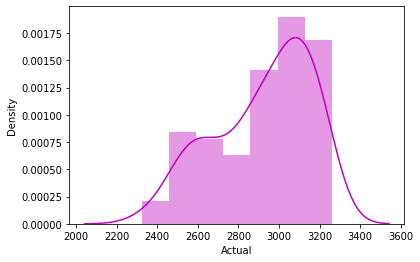

In [8]:
sns.distplot(df['Actual'], norm_hist=True, color='M')

Here, for the simplysity, we have replaced NAN values with mean of the data set. you may try with some other imputation techniques. After imputation, data follows original distribution, which is shown in this figure.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


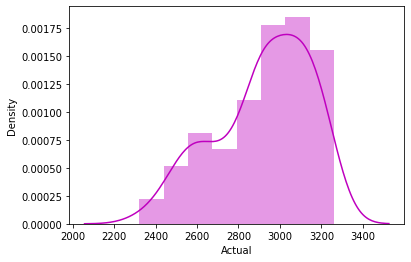

In [9]:

df['Actual'].fillna(df['Actual'].mean(), inplace=True)
sns.distplot(df['Actual'], norm_hist=True, color='M')

To check whether our data follows normal distribution or not, let's plot q-q plot, if it follows the linear trend, then we can safely say that our data follows normal distribution

((array([-2.51160134, -2.18120453, -1.99078461, -1.85328966, -1.74389653,
         -1.65210369, -1.57243504, -1.50165599, -1.43768921, -1.37911748,
         -1.32492865, -1.27437345, -1.22688085, -1.18200515, -1.13939141,
         -1.09875208, -1.05985076, -1.02249056, -0.98650562, -0.95175482,
         -0.91811699, -0.88548723, -0.85377407, -0.82289719, -0.79278561,
         -0.76337628, -0.73461286, -0.70644477, -0.6788264 , -0.65171639,
         -0.62507715, -0.59887431, -0.57307637, -0.54765434, -0.52258146,
         -0.49783289, -0.47338559, -0.44921802, -0.42531005, -0.40164277,
         -0.37819838, -0.35496006, -0.33191189, -0.30903872, -0.28632612,
         -0.26376029, -0.241328  , -0.2190165 , -0.19681351, -0.17470714,
         -0.15268583, -0.13073832, -0.10885362, -0.08702093, -0.06522964,
         -0.0434693 , -0.02172952,  0.        ,  0.02172952,  0.0434693 ,
          0.06522964,  0.08702093,  0.10885362,  0.13073832,  0.15268583,
          0.17470714,  0.19681351,  0.

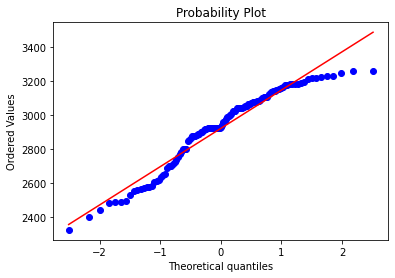

In [10]:
sts.probplot(df['Actual'], dist='norm', plot=plt)

Times series data are somewhat unique in nature, we have to convert it into Series format

In [11]:
op = df.squeeze()

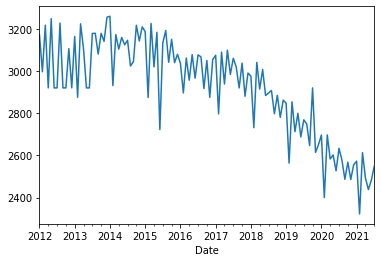

In [12]:
df['Actual'].plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9374503f10>]],
      dtype=object)

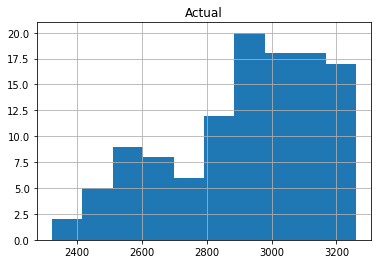

In [13]:
df.hist()


Now, we have to check our data is stationary or not. For that we have to perform Augmented Dickey-Fuller test. If p value from the test is < 0.05 or(5%) then alternative hypothesis is rejected and we accept the null hypothesis(That given series is stationary)

In [14]:
def perform_adf_test(series):
  result=adfuller(series)
  print('ADF statistics: {}'.format(result[0]))
  print('p-value: {}'.format(result[1]))

In [15]:
perform_adf_test(op)

ADF statistics: 1.1375817079906267
p-value: 0.9955249425520345


Since the p-value is much more than the value 0.05, hence, we can come to the conclusion that given series is non stationary series.(Also from the figure also, it is obviously seen!!)

Now, let us do the differeencing of the series and remove the trend. Generally differencing one time will serve the purpose, but let's see in our case how many times we have to do the differencing. for that one loop is ran untill given time series won't become stationary.

In [16]:
op_stationary = op.diff(3).dropna()

In [17]:
perform_adf_test(op_stationary)


ADF statistics: -2.8983421466047044
p-value: 0.04554112319445696


Series is stationary with 3 differencing


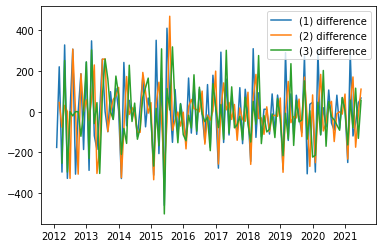

In [18]:
term = 1
while True:
  op_stationary = op.diff(term).dropna()
  result=adfuller(op_stationary)
  i = (result[1])
  plt.plot(op_stationary, label='(%s) difference'%term)
  plt.legend(loc='upper right')
  term = term+1
  if(i <= 0.05):
    print("Series is stationary with", term-1 ,"differencing")
    break


From the figure it is seen that after 3rd difference, our series became stationary series, but in general 3 time difference is not considered as a good fit for any model, it will un-necessary increase the complexity of the model.

**Fit AR Model**

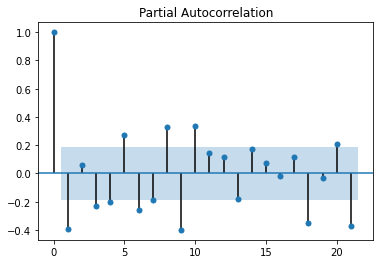

In [19]:
plot_pacf(op_stationary)
plt.show()

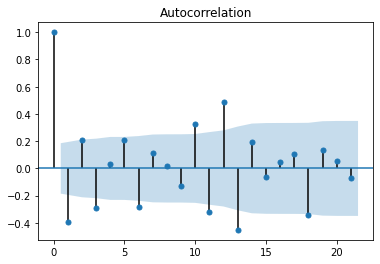

In [20]:
plot_acf(op_stationary)
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-

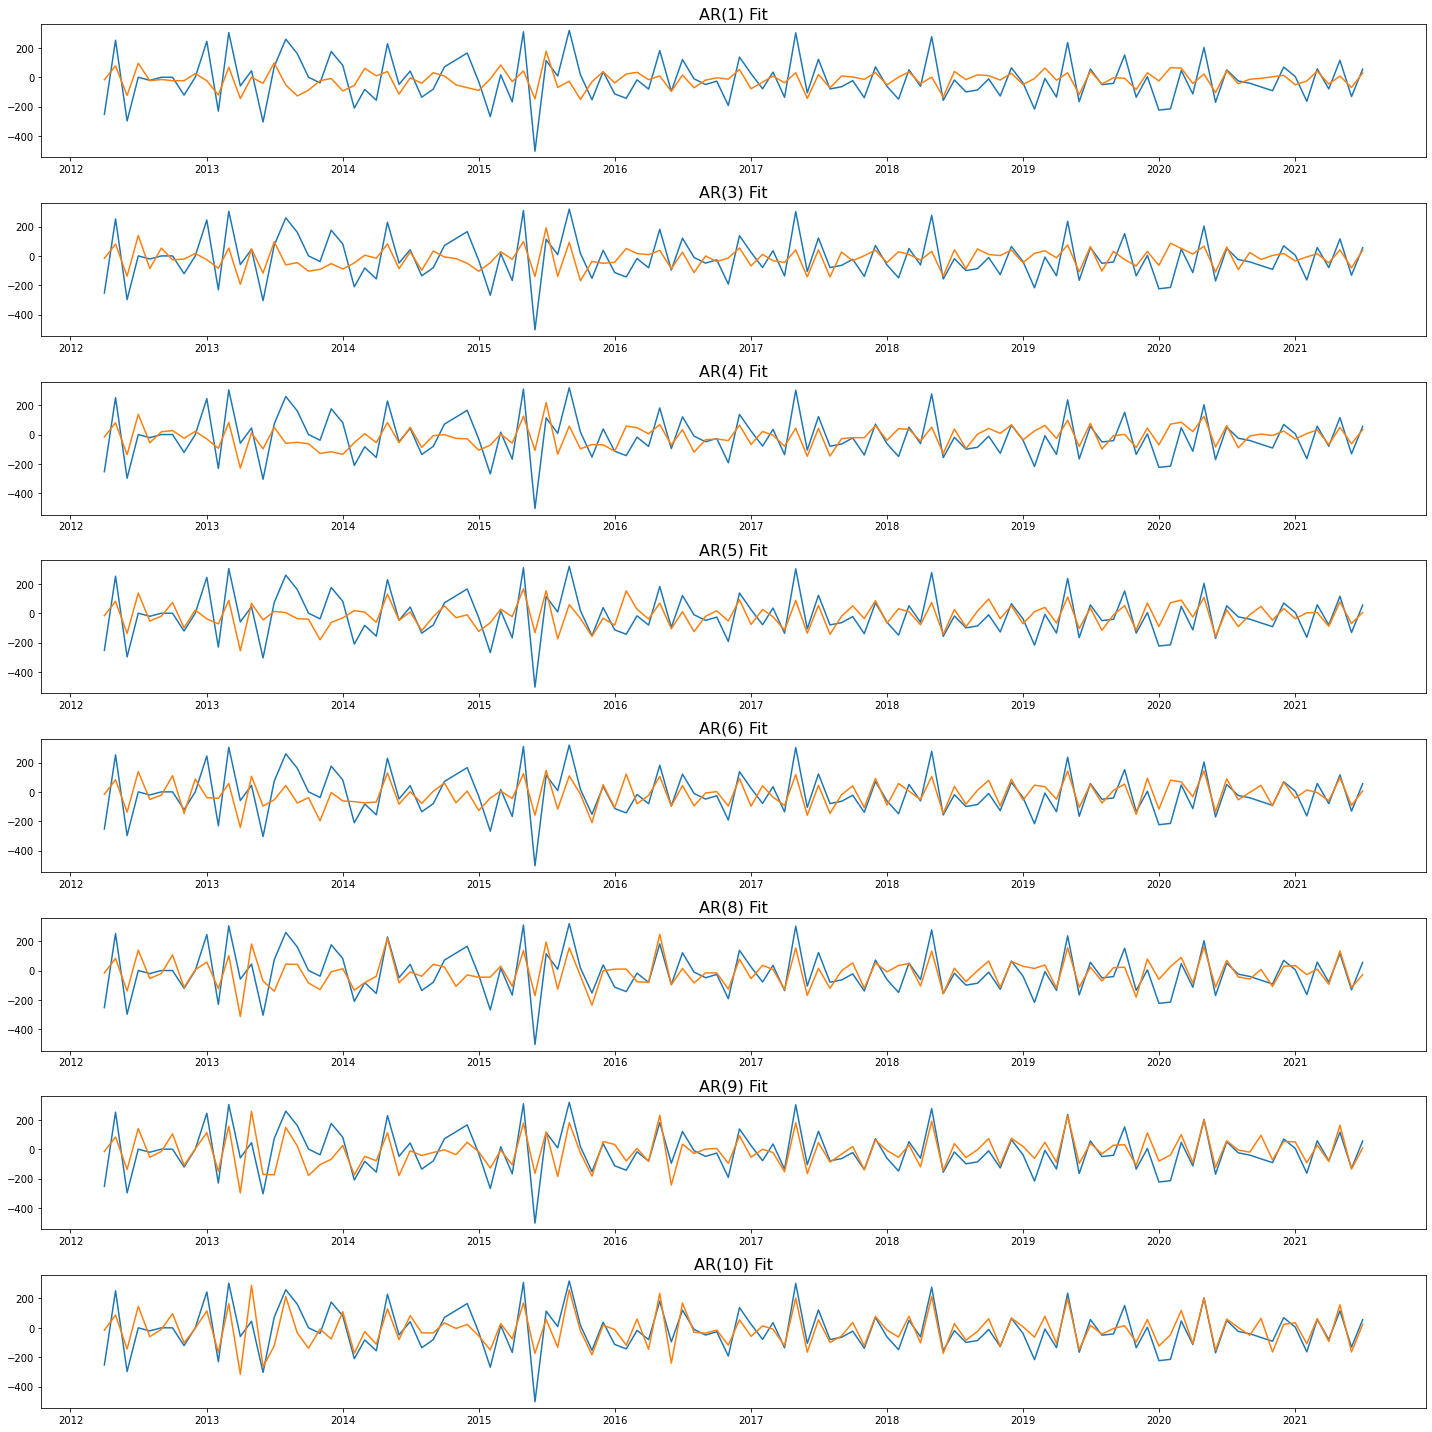

In [21]:
ar_order = [1,3,4,5,6,8,9,10]
fitted_model_dict={}

plt.figure(figsize=(20,20))
for idx,ar_order in enumerate(ar_order):

  #creating AR(p)models
  ar_model = ARMA(op_stationary, order=(ar_order,0))
  ar_model_fit = ar_model.fit()
  fitted_model_dict[ar_order] = ar_model_fit
  plt.subplot(8,1,idx+1)
  plt.plot(op_stationary)
  plt.plot(ar_model_fit.fittedvalues)
  plt.title('AR(%s) Fit'%ar_order, fontsize=16)

  plt.tight_layout()

**AIC**

In [22]:
ar_orders=[1,3,5,8,10]
for i in ar_orders:
  print("AIC for AR (%s): %s"%(i,fitted_model_dict[i].aic))

AIC for AR (1): 1422.2451757752497
AIC for AR (3): 1418.9965288867052
AIC for AR (5): 1410.0038473551713
AIC for AR (8): 1390.2850089288236
AIC for AR (10): 1355.6920303274887


In [23]:
for i in ar_orders:
  print("AIC for AR (%s): %s"%(i,fitted_model_dict[i].bic))

AIC for AR (1): 1430.400672389135
AIC for AR (3): 1432.5890232431807
AIC for AR (5): 1429.033339454237
AIC for AR (8): 1417.4699976417746
AIC for AR (10): 1388.31401678303


In [24]:
from statsmodels.tsa.arima_model import ARIMA

In [25]:
train_op = op_stationary[:'01-12-2019']
test_op = op_stationary['01-01-2020':]

In [26]:
model = ARIMA(train_op,order=(5,0,2))
model_fit=model.fit()


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [27]:
result_train = model.predict(train_op)
result_train.shape

(82,)

In [28]:
result_test = model.predict(test_op)
result_test.shape

(82,)

In [29]:
from sklearn.metrics import r2_score,mean_squared_error
print("Mean Squared Error of a model is: ",mean_squared_error(train_op,result_train))
print("R2 score : ", r2_score(train_op,result_train))

Mean Squared Error of a model is:  1.6073344680785248e+22
R2 score :  -6.709057129904403e+17


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


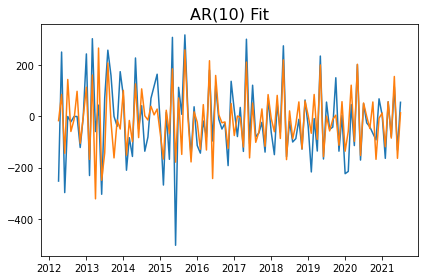

In [30]:
ar_model = ARMA(op_stationary, order=(10,1))
ar_model_fit = ar_model.fit()
fitted_model_dict[5,2] = ar_model_fit
plt.plot(op_stationary)
plt.plot(ar_model_fit.fittedvalues)
plt.title('AR(%s) Fit'%ar_order, fontsize=16)

plt.tight_layout()

It looks like ARMA model is not best suitable for the given time series, so lets try for exponential smoothing of the data

In [31]:
import statsmodels.tsa.holtwinters as ets

In [32]:
df=pd.read_excel('Oil_production_data.xlsx', usecols=['Date','Actual'],index_col='Date')
df['Actual'].fillna(method='ffill', inplace=True)


In [33]:
oil = df.squeeze()
type(oil)

pandas.core.series.Series

In [34]:
oil_train = df[:'2020-12-01'].squeeze()
oil_test = df['2021-01-01':].squeeze()

In [35]:
print("Train size is {} and Test size is {}".format(oil_train.shape,oil_test.shape))

Train size is (108,) and Test size is (7,)


In [36]:
model = ets.ExponentialSmoothing(oil_train,trend='mul').fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [37]:
forecast = model.forecast(7)

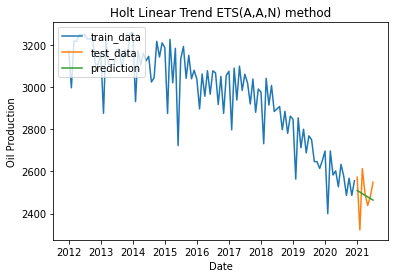

In [38]:
fig1, ax = plt.subplots()
ax.plot(oil_train, label="train_data")
ax.plot(oil_test, label = 'test_data')
ax.plot(forecast, label='prediction')
plt.legend(loc='upper left')
plt.title('Holt Linear Trend ETS(A,A,N) method')
plt.ylabel('Oil Production')
plt.xlabel('Date')
plt.show()

**Forecast using Holt's method**

In [39]:
from statsmodels.tsa.holtwinters import Holt

In [40]:
fit1 = Holt(oil_test).fit()
fit2 = Holt(oil_test, exponential=True).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'Oil Production Forecasting')

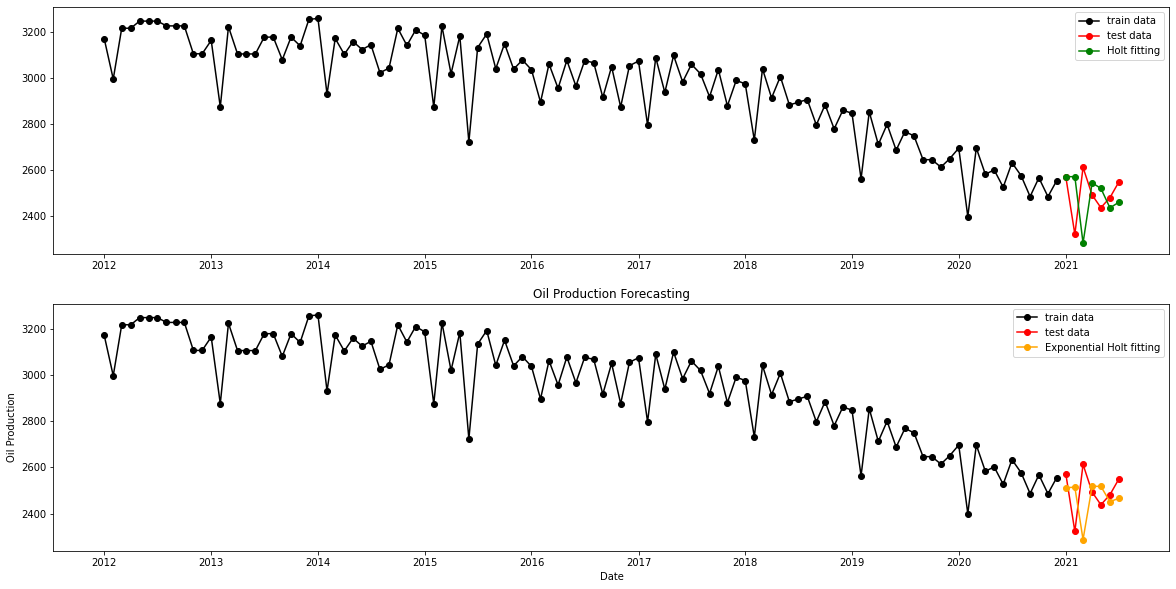

In [41]:
plt.figure(figsize = (20,10))
plt.subplot(2,1,1)
plt.plot(oil_train, marker='o', color='black', label='train data')
plt.plot(oil_test, marker = 'o', color='red', label='test data')
plt.plot(fit1.fittedvalues, marker='o', color='green', label='Holt fitting')
plt.legend(loc='upper right')
plt.subplot(2,1,2)
plt.plot(oil_train, marker='o', color='black', label='train data')
plt.plot(oil_test, marker = 'o', color='red', label='test data')
plt.plot(fit2.fittedvalues, marker = 'o', color='orange', label = 'Exponential Holt fitting')

plt.legend(loc='upper right')
plt.xlabel('Date')
plt.ylabel('Oil Production')
plt.title("Oil Production Forecasting")

**Using Log transformation**

(0.0, 10.0)

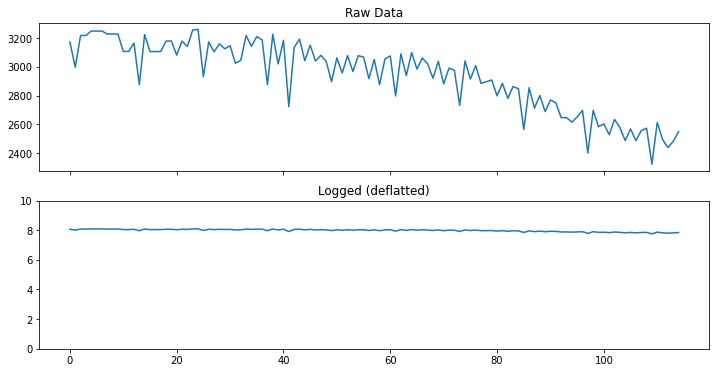

In [42]:
fig, ax = plt.subplots(2,sharex=True, figsize=(12,6))
ax[0].plot(df.values)
ax[0].set_title('Raw Data')
ax[1].plot(np.log(df.values))
ax[1].set_title('Logged (deflatted)')
ax[1].set_ylim(0,10)

In [43]:
log_data = np.log(df.values)

In [44]:
from statsmodels.tsa.stattools import kpss
print(" > Is the data stationary ?")
dftest = kpss(np.log(df), 'ct')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[3].items():
    print("\t{}: {}".format(k, v))

 > Is the data stationary ?
Test statistic = 0.221
P-value = 0.010
Critical values :
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


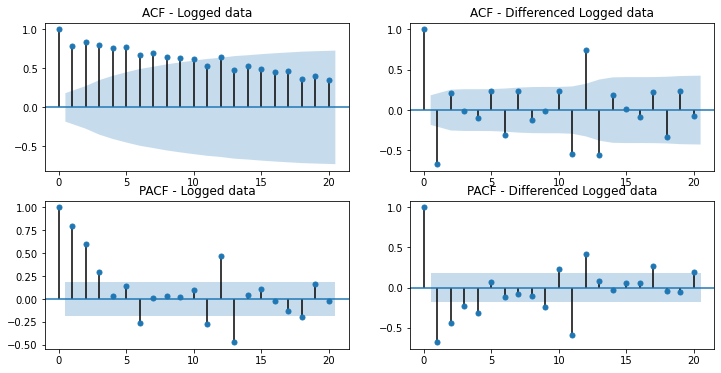

In [45]:
fig, ax = plt.subplots(2, 2, figsize=(12,6))
first_diff = (np.log(df)- np.log(df).shift()).dropna()
ax[0, 0] = plot_acf(np.log(df), ax=ax[0, 0], lags=20, title="ACF - Logged data")
ax[1, 0] = plot_pacf(np.log(df), ax=ax[1, 0], lags=20, title="PACF - Logged data")
ax[0, 1] = plot_acf(first_diff , ax=ax[0, 1], lags=20, title="ACF - Differenced Logged data")
ax[1, 1] = plot_pacf(first_diff, ax=ax[1, 1], lags=20, title="PACF - Differenced Logged data")

**Thumb Rule**
Rule 1 : If the series has positive autocorrelations out to a high number of lags, then it probably needs a higher order of differencing.

Rule 2 : If the lag-1 autocorrelation is zero or negative, or the autocorrelations are all small and patternless, then the series does not need a higher order of differencing. If the lag-1 autocorrelation is -0.5 or more negative, the series may be overdifferenced.”

(by Robert Nau, Statistical Forecasting)

In [46]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(np.log(df).dropna(), (0, 0, 0))
res_000 = model.fit()
print(res_000.summary())

model = ARIMA(np.log(df).dropna(), (0, 1, 0))
res_010 = model.fit()
print(res_010.summary())

                              ARMA Model Results                              
Dep. Variable:                 Actual   No. Observations:                  115
Model:                     ARMA(0, 0)   Log Likelihood                 121.627
Method:                           css   S.D. of innovations              0.084
Date:                Sat, 15 Jan 2022   AIC                           -239.254
Time:                        17:10:41   BIC                           -233.764
Sample:                    01-01-2012   HQIC                          -237.025
                         - 07-01-2021                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.9815      0.008   1018.575      0.000       7.966       7.997
                             ARIMA Model Results                              
Dep. Variable:               D.Actual   No. Observat

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


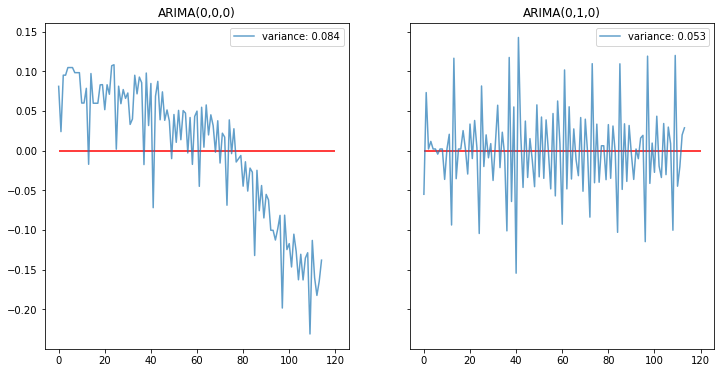

In [47]:
fig, ax = plt.subplots(1,2, sharey=True,figsize=(12,6))
ax[0].plot(res_000.resid.values, alpha = 0.7, label = 'variance: {:.3f}'.format(np.std(res_000.resid.values)))
ax[0].hlines(0, xmin=0, xmax=120, color='r')
ax[0].legend()
ax[0].set_title("ARIMA(0,0,0)")
ax[1].plot(res_010.resid.values, alpha = 0.7, label = 'variance: {:.3f}'.format(np.std(res_010.resid.values)))
ax[1].hlines(0, xmin=0, xmax=120, color='r')
ax[1].set_title("ARIMA(0,1,0)")
ax[1].legend()


**Choosing MA order**

In [48]:
model = ARIMA(np.log(df).dropna(), (0, 1, 1))
res_011 = model.fit()
print(res_011.summary()) ##Why q = 1?

                             ARIMA Model Results                              
Dep. Variable:               D.Actual   No. Observations:                  114
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 217.284
Method:                       css-mle   S.D. of innovations              0.036
Date:                Sat, 15 Jan 2022   AIC                           -428.568
Time:                        17:10:41   BIC                           -420.360
Sample:                    02-01-2012   HQIC                          -425.237
                         - 07-01-2021                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0022      0.001     -3.924      0.000      -0.003      -0.001
ma.L1.D.Actual    -0.8394      0.038    -21.960      0.000      -0.914      -0.764
                                    

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


**For AR order**

In [49]:
model = ARIMA(np.log(df).dropna(), (1, 1, 1))
res_111 = model.fit()
print(res_111.summary())

model = ARIMA(np.log(df).dropna(), (2, 1, 1))
res_211 = model.fit()
print(res_211.summary())

model = ARIMA(np.log(df).dropna(), (3, 1, 1))
res_311 = model.fit()
print(res_311.summary())

model = ARIMA(np.log(df).dropna(), (4, 1, 1))
res_411 = model.fit()
print(res_411.summary())


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:               D.Actual   No. Observations:                  114
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 224.413
Method:                       css-mle   S.D. of innovations              0.034
Date:                Sat, 15 Jan 2022   AIC                           -440.827
Time:                        17:10:41   BIC                           -429.882
Sample:                    02-01-2012   HQIC                          -436.385
                         - 07-01-2021                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0022      0.001     -3.580      0.001      -0.003      -0.001
ar.L1.D.Actual    -0.3857      0.096     -4.014      0.000      -0.574      -0.197
ma.L1.D.Actual    -0.7407      0.066

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:               D.Actual   No. Observations:                  114
Model:                 ARIMA(2, 1, 1)   Log Likelihood                 224.665
Method:                       css-mle   S.D. of innovations              0.034
Date:                Sat, 15 Jan 2022   AIC                           -439.331
Time:                        17:10:42   BIC                           -425.650
Sample:                    02-01-2012   HQIC                          -433.779
                         - 07-01-2021                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0022      0.001     -3.402      0.001      -0.003      -0.001
ar.L1.D.Actual    -0.4496      0.136     -3.305      0.001      -0.716      -0.183
ar.L2.D.Actual    -0.0891      0.126

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:               D.Actual   No. Observations:                  114
Model:                 ARIMA(3, 1, 1)   Log Likelihood                 224.703
Method:                       css-mle   S.D. of innovations              0.033
Date:                Sat, 15 Jan 2022   AIC                           -437.406
Time:                        17:10:42   BIC                           -420.989
Sample:                    02-01-2012   HQIC                          -430.743
                         - 07-01-2021                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0022      0.001     -3.463      0.001      -0.003      -0.001
ar.L1.D.Actual    -0.4241      0.157     -2.701      0.008      -0.732      -0.116
ar.L2.D.Actual    -0.0535      0.175

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:               D.Actual   No. Observations:                  114
Model:                 ARIMA(4, 1, 1)   Log Likelihood                 226.358
Method:                       css-mle   S.D. of innovations              0.033
Date:                Sat, 15 Jan 2022   AIC                           -438.717
Time:                        17:10:43   BIC                           -419.563
Sample:                    02-01-2012   HQIC                          -430.943
                         - 07-01-2021                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0020      0.001     -2.250      0.026      -0.004      -0.000
ar.L1.D.Actual    -1.4260      0.220     -6.494      0.000      -1.856      -0.996
ar.L2.D.Actual    -1.1574      0.251

Text(0.5, 1.0, 'ARIMA(4,1,1)')

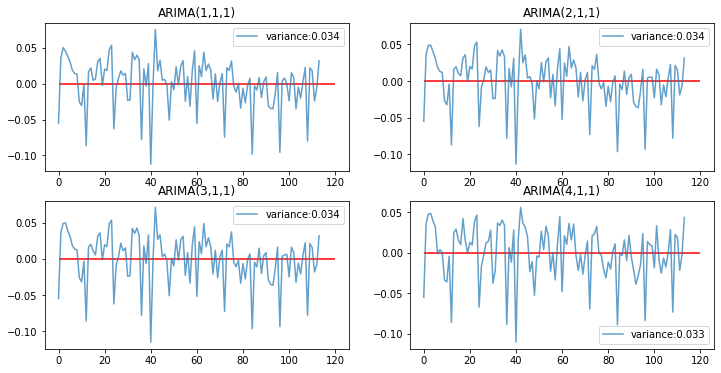

In [50]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
plt.plot(res_111.resid.values,alpha=0.7, label='variance:{:.3f}'.format(np.std(res_111.resid.values)))
plt.hlines(0,0,120,color='red')
plt.legend()
plt.title("ARIMA(1,1,1)")
plt.subplot(2,2,2)
plt.plot(res_211.resid.values,alpha=0.7, label='variance:{:.3f}'.format(np.std(res_211.resid.values)))
plt.hlines(0,xmin = 0, xmax= 120, color='red')
plt.legend()
plt.title("ARIMA(2,1,1)")
plt.subplot(2,2,3)
plt.plot(res_311.resid.values,alpha=0.7, label='variance:{:.3f}'.format(np.std(res_311.resid.values)))
plt.hlines(0,xmin = 0, xmax= 120, color='red')
plt.legend()
plt.title("ARIMA(3,1,1)")
plt.subplot(2,2,4)
plt.plot(res_411.resid.values,alpha=0.7, label='variance:{:.3f}'.format(np.std(res_411.resid.values)))
plt.hlines(0,xmin = 0, xmax= 120, color='red')
plt.legend()
plt.title("ARIMA(4,1,1)")

Text(0.5, 1.0, 'PACF of ARIMA(1,1,1) residuals')

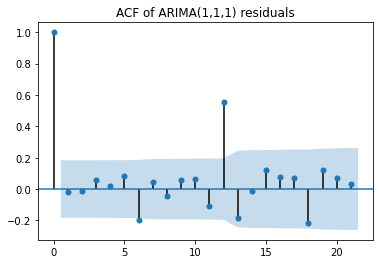

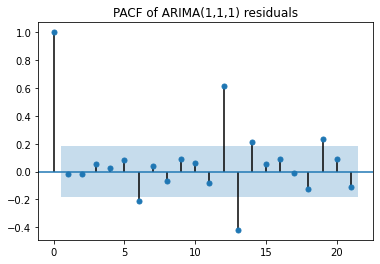

In [51]:

plot_acf(res_111.resid.values)
plt.title("ACF of ARIMA(1,1,1) residuals")

plot_pacf(res_111.resid.values)
plt.title("PACF of ARIMA(1,1,1) residuals")

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


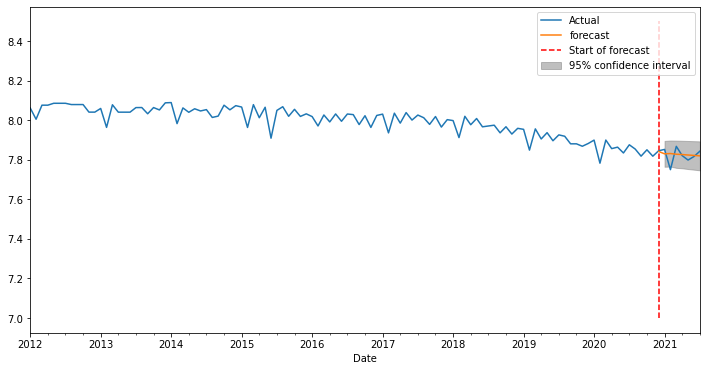

In [58]:
model = ARIMA(np.log(df).dropna()[:-7],order=(1,1,1))
res_111 = model.fit()

fig, ax = plt.subplots(figsize=(12, 6))
df.index = pd.to_datetime(df.index, format="%Y-%m")
np.log(df).dropna()[:].plot(ax=ax);
ax.vlines('2020-12', 7,8.5, linestyle='--', color='r', label='Start of forecast');
ax = res_111.plot_predict('2020-12', '2021-07', dynamic=True, plot_insample=False, ax=ax);